In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Question 1:
1. First, get a general sense of the data.
a. Check for missing values and report the trends in which data is missing, to inform your reader.
b. Look into the descriptive statistics and “summarize” the data. Highlight any problems or trends that you noticed.
c. Check and comment on the outliers in the dataset
d. Visually investigate the distributions / trends of the numeric variables and comment on them.

In [3]:
dfloan = pd.read_csv('loans.csv')

In [4]:
dfloan

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,partner_id,posted_time,disbursed_time,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date
0,653051,300.0,300.0,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:12:39+00:00,2013-12-17 08:00:00+00:00,2014-01-02 10:06:32+00:00,12.0,12,NaN,female,irregular,2014-01-01
1,653053,575.0,575.0,Rickshaw,Transportation,to repair and maintain the auto rickshaw used ...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:51:08+00:00,2013-12-17 08:00:00+00:00,2014-01-02 09:17:23+00:00,11.0,14,NaN,"female, female",irregular,2014-01-01
2,653068,150.0,150.0,Transportation,Transportation,To repair their old cycle-van and buy another ...,IN,India,Maynaguri,INR,334.0,2014-01-01 09:58:07+00:00,2013-12-17 08:00:00+00:00,2014-01-01 16:01:36+00:00,43.0,6,"user_favorite, user_favorite",female,bullet,2014-01-01
3,653063,200.0,200.0,Embroidery,Arts,to purchase an embroidery machine and a variet...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 08:03:11+00:00,2013-12-24 08:00:00+00:00,2014-01-01 13:00:00+00:00,11.0,8,NaN,female,irregular,2014-01-01
4,653084,400.0,400.0,Milk Sales,Food,to purchase one buffalo.,PK,Pakistan,Abdul Hakeem,PKR,245.0,2014-01-01 11:53:19+00:00,2013-12-17 08:00:00+00:00,2014-01-01 19:18:51+00:00,14.0,16,NaN,female,monthly,2014-01-01
5,1080148,250.0,250.0,Services,Services,purchase leather for my business using ksh 20000.,KE,Kenya,NaN,KES,NaN,2014-01-01 10:06:19+00:00,2014-01-30 01:42:48+00:00,2014-01-29 14:14:57+00:00,4.0,6,NaN,female,irregular,2014-01-01
6,653067,200.0,200.0,Dairy,Agriculture,To purchase a dairy cow and start a milk produ...,IN,India,Maynaguri,INR,334.0,2014-01-01 09:51:02+00:00,2013-12-16 08:00:00+00:00,2014-01-01 17:18:09+00:00,43.0,8,"user_favorite, user_favorite",female,bullet,2014-01-01
7,653078,400.0,400.0,Beauty Salon,Services,to buy more hair and skin care products.,PK,Pakistan,Ellahabad,PKR,245.0,2014-01-01 11:46:01+00:00,2013-12-20 08:00:00+00:00,2014-01-10 18:18:44+00:00,14.0,8,"#Elderly, #Woman Owned Biz",female,monthly,2014-01-01
8,653082,475.0,475.0,Manufacturing,Manufacturing,"to purchase leather, plastic soles and heels i...",PK,Pakistan,Lahore,PKR,245.0,2014-01-01 11:49:43+00:00,2013-12-20 08:00:00+00:00,2014-01-01 18:47:21+00:00,14.0,19,user_favorite,female,monthly,2014-01-01
9,653048,625.0,625.0,Food Production/Sales,Food,"to buy a stall, gram flour, ketchup, and coal ...",PK,Pakistan,Lahore,PKR,247.0,2014-01-01 05:41:03+00:00,2013-12-17 08:00:00+00:00,2014-01-03 15:45:04+00:00,11.0,24,NaN,female,irregular,2014-01-01


In [211]:
dfloan["posted_time"]=pd.to_datetime(dfloan["posted_time"])
dfloan["disbursed_time"]=pd.to_datetime(dfloan["disbursed_time"])
dfloan["funded_time"]=pd.to_datetime(dfloan["funded_time"])
dfloan["date"]=pd.to_datetime(dfloan["date"])

a. Check for missing values and report the trends in which data is missing, to inform your reader.

In [6]:
loan_missing=dfloan.isna().sum()
loan_missing

id                         0
funded_amount              0
loan_amount                0
activity                   0
sector                     0
use                     4232
country_code               8
country                    0
region                 56800
currency                   0
partner_id             13507
posted_time                0
disbursed_time          2396
funded_time            48331
term_in_months             0
lender_count               0
tags                  171416
borrower_genders        4221
repayment_interval         0
date                       0
dtype: int64

b. Look into the descriptive statistics and “summarize” the data. Highlight any problems or trends that you noticed.

In [213]:
dfloan.describe()

,id,funded_amount,loan_amount,partner_id,term_in_months,lender_count
count,6.712050e+05,671205.000000,671205.000000,657698.000000,671205.000000,671205.000000
mean,9.932486e+05,785.995061,842.397107,178.199616,13.739022,20.590922
std,1.966113e+05,1130.398941,1198.660073,94.247581,8.598919,28.459551
min,6.530470e+05,0.000000,25.000000,9.000000,1.000000,0.000000
25%,8.230720e+05,250.000000,275.000000,126.000000,8.000000,7.000000
50%,9.927800e+05,450.000000,500.000000,145.000000,13.000000,13.000000
75%,1.163653e+06,900.000000,1000.000000,204.000000,14.000000,24.000000
max,1.340339e+06,100000.000000,100000.000000,536.000000,158.000000,2986.000000


c. Check and comment on the outliers in the dataset

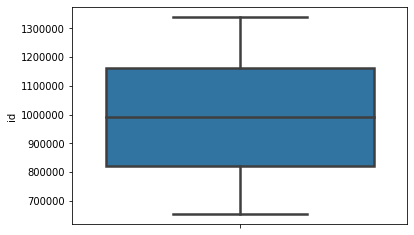

In [10]:
ax = sns.boxplot(x=dfloan['id'], orient='v', linewidth=2.5) 

In [11]:
q1 = dfloan['id'].quantile(0.25) # Q1
q3 = dfloan['id'].quantile(0.75) # Q3
outlier_margin = q3+((q3-q1)*1.5) # Q3-Q1 is the IQR. Data points outside 1.5 IQR are considered to be outliers

print('Q1:', q1, 'Q3:', q3, 'Outlier Margin:', outlier_margin)
outliersRemoved=dfloan[dfloan['id'] < outlier_margin]

print('Original DataFrame Size:', dfloan.shape)
print('DataFrame Size after Outliers Removed:', outliersRemoved.shape)

Q1: 823072.0 Q3: 1163653.0 Outlier Margin: 1674524.5
Original DataFrame Size: (671205, 20)
DataFrame Size after Outliers Removed: (671205, 20)


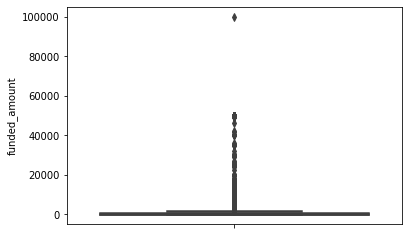

In [12]:
ax = sns.boxplot(x=dfloan['funded_amount'], orient='v', linewidth=2.5) 

In [13]:
q1 = dfloan['funded_amount'].quantile(0.25) # Q1
q3 = dfloan['funded_amount'].quantile(0.75) # Q3
outlier_margin = q3+((q3-q1)*1.5) # Q3-Q1 is the IQR. Data points outside 1.5 IQR are considered to be outliers

print('Q1:', q1, 'Q3:', q3, 'Outlier Margin:', outlier_margin)
outliersRemoved=dfloan[dfloan['funded_amount'] < outlier_margin]

print('Original DataFrame Size:', dfloan.shape)
print('DataFrame Size after Outliers Removed:', outliersRemoved.shape)

Q1: 250.0 Q3: 900.0 Outlier Margin: 1875.0
Original DataFrame Size: (671205, 20)
DataFrame Size after Outliers Removed: (615348, 20)


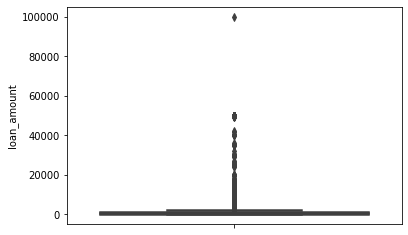

In [14]:
ax = sns.boxplot(x=dfloan['loan_amount'], orient='v', linewidth=2.5) 

In [15]:
q1 = dfloan['loan_amount'].quantile(0.25) # Q1
q3 = dfloan['loan_amount'].quantile(0.75) # Q3
outlier_margin = q3+((q3-q1)*1.5) # Q3-Q1 is the IQR. Data points outside 1.5 IQR are considered to be outliers

print('Q1:', q1, 'Q3:', q3, 'Outlier Margin:', outlier_margin)
outliersRemoved=dfloan[dfloan['loan_amount'] < outlier_margin]

print('Original DataFrame Size:', dfloan.shape)
print('DataFrame Size after Outliers Removed:', outliersRemoved.shape)

Q1: 275.0 Q3: 1000.0 Outlier Margin: 2087.5
Original DataFrame Size: (671205, 20)
DataFrame Size after Outliers Removed: (620212, 20)


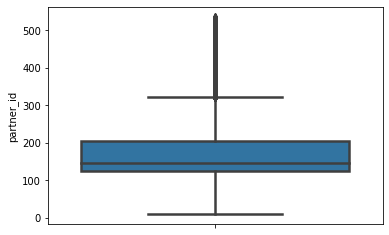

In [16]:
ax = sns.boxplot(x=dfloan['partner_id'], orient='v', linewidth=2.5) 

In [17]:
q1 = dfloan['partner_id'].quantile(0.25) # Q1
q3 = dfloan['partner_id'].quantile(0.75) # Q3
outlier_margin = q3+((q3-q1)*1.5) # Q3-Q1 is the IQR. Data points outside 1.5 IQR are considered to be outliers

print('Q1:', q1, 'Q3:', q3, 'Outlier Margin:', outlier_margin)
outliersRemoved=dfloan[dfloan['partner_id'] < outlier_margin]

print('Original DataFrame Size:', dfloan.shape)
print('DataFrame Size after Outliers Removed:', outliersRemoved.shape)

Q1: 126.0 Q3: 204.0 Outlier Margin: 321.0
Original DataFrame Size: (671205, 20)
DataFrame Size after Outliers Removed: (596702, 20)


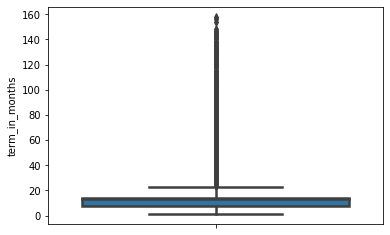

In [18]:
ax = sns.boxplot(x=dfloan['term_in_months'], orient='v', linewidth=2.5)

In [19]:
q1 = dfloan['term_in_months'].quantile(0.25) # Q1
q3 = dfloan['term_in_months'].quantile(0.75) # Q3
outlier_margin = q3+((q3-q1)*1.5) # Q3-Q1 is the IQR. Data points outside 1.5 IQR are considered to be outliers

print('Q1:', q1, 'Q3:', q3, 'Outlier Margin:', outlier_margin)
outliersRemoved=dfloan[dfloan['term_in_months'] < outlier_margin]

print('Original DataFrame Size:', dfloan.shape)
print('DataFrame Size after Outliers Removed:', outliersRemoved.shape)

Q1: 8.0 Q3: 14.0 Outlier Margin: 23.0
Original DataFrame Size: (671205, 20)
DataFrame Size after Outliers Removed: (604392, 20)


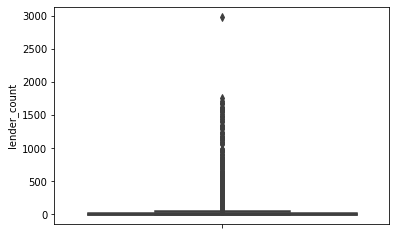

In [20]:
ax = sns.boxplot(x=dfloan['lender_count'], orient='v', linewidth=2.5)

In [21]:
q1 = dfloan['lender_count'].quantile(0.25) # Q1
q3 = dfloan['lender_count'].quantile(0.75) # Q3
outlier_margin = q3+((q3-q1)*1.5) # Q3-Q1 is the IQR. Data points outside 1.5 IQR are considered to be outliers

print('Q1:', q1, 'Q3:', q3, 'Outlier Margin:', outlier_margin)
outliersRemoved=dfloan[dfloan['lender_count'] < outlier_margin]

print('Original DataFrame Size:', dfloan.shape)
print('DataFrame Size after Outliers Removed:', outliersRemoved.shape)

Q1: 7.0 Q3: 24.0 Outlier Margin: 49.5
Original DataFrame Size: (671205, 20)
DataFrame Size after Outliers Removed: (617077, 20)


d. Visually investigate the distributions / trends of the numeric variables and comment on them.

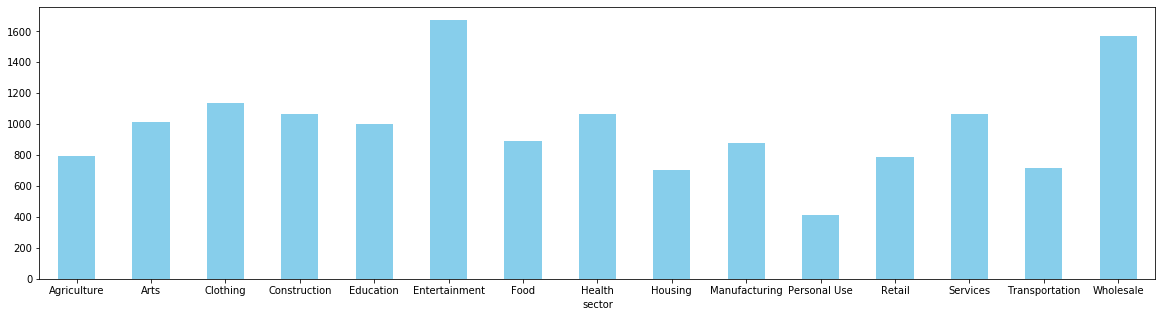

In [32]:
avgLoanSector = dfloan.groupby('sector')['loan_amount'].mean()#Average Loan amount by Sector:
avgLoanSector.plot.bar(color='skyblue', rot = 0, alpha = 1,figsize=(20,5));

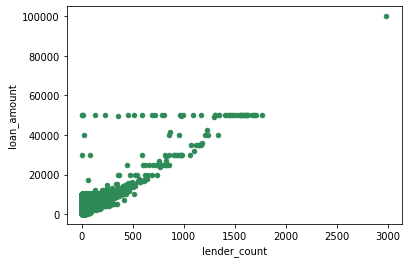

In [33]:
dfloan.plot.scatter(x="lender_count", y="loan_amount", color = 'seagreen');# Scatter plot of Loan amount vs Lender Count

In [16]:
avgLoanCounrty = dfloan.groupby('country')['loan_amount'].mean()#Average Loan amount by Country:
avgLoanCounrty

country
Afghanistan                              7000.000000
Albania                                  1378.748707
Armenia                                  1496.396710
Azerbaijan                               1485.192802
Belize                                    912.200000
Benin                                    1044.164990
Bhutan                                  10000.000000
Bolivia                                  2253.378378
Brazil                                   2331.690141
Burkina Faso                             1208.414634
Burundi                                  3031.647727
Cambodia                                  570.464462
Cameroon                                  419.887892
Chile                                   12265.000000
China                                    2839.738806
Colombia                                  655.403501
Congo                                    6142.578125
Costa Rica                               1380.989750
Cote D'Ivoire                         

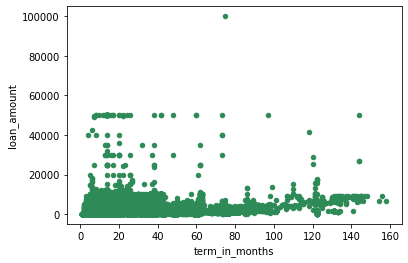

In [48]:
dfloan.plot.scatter(x="term_in_months", y="loan_amount", color = 'seagreen');# Scatter plot of Loan amount vs Term in Months

# 2. Explore patterns in the data. Illustrate the patterns with appropriate graphs. To get you started, here are seven ideas to explore:
a. Do the number of borrowers vary over industry sectors?
b. How do the number of borrowers and loan amounts vary across countries?
c. What factors may explain the difference between the requested “loan_amount” and the actual “funded_amount” that a borrower has received.
d. Are there any patterns of relationships between repayment behavior (“repayment_interval”) and other factors?
e. Is there a noticeable gender effect in this dataset?
f. Group the countries by their continents and highlight differences across the continents
g. One of the tags is called “user_favorite.” Are there any noticeable differences between records with and without this tag?

In [ ]:
a. Do the number of borrowers vary over industry sectors?

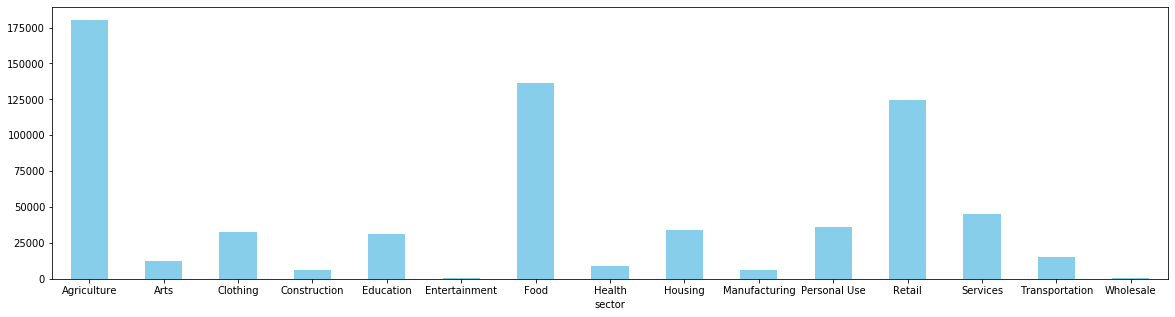

In [64]:
CountbySector = dfloan.groupby('sector').count()
CountbySector['id'].plot.bar(color='skyblue', rot = 0, alpha = 1,figsize=(20,5));

b. How do the number of borrowers and loan amounts vary across countries?

In [18]:
CountbyCountry = dfloan.groupby('country').count()#Number of Borrowers per country
CountbyCountry['id']

country
Afghanistan                                  2
Albania                                   1934
Armenia                                   8631
Azerbaijan                                1945
Belize                                     125
Benin                                      497
Bhutan                                       2
Bolivia                                   8806
Brazil                                     284
Burkina Faso                              2460
Burundi                                    880
Cambodia                                 34836
Cameroon                                  2230
Chile                                       10
China                                      134
Colombia                                 21995
Congo                                      128
Costa Rica                                1561
Cote D'Ivoire                                1
Dominican Republic                         496
Ecuador                                  13521
Egypt

In [79]:
CountbyCountry = dfloan.groupby('country').sum()# Loan amount Sum by Counrty
CountbyCountry['loan_amount']

country
Afghanistan                                14000.0
Albania                                  2666500.0
Armenia                                 12915400.0
Azerbaijan                               2888700.0
Belize                                    114025.0
Benin                                     518950.0
Bhutan                                     20000.0
Bolivia                                 19843250.0
Brazil                                    662200.0
Burkina Faso                             2972700.0
Burundi                                  2667850.0
Cambodia                                19872700.0
Cameroon                                  936350.0
Chile                                     122650.0
China                                     380525.0
Colombia                                14415600.0
Congo                                     786250.0
Costa Rica                               2155725.0
Cote D'Ivoire                              50000.0
Dominican Republic     

c. What factors may explain the difference between the requested “loan_amount” and the actual “funded_amount” that a borrower has received.

In [96]:
dfloan['difference']=dfloan['loan_amount']-dfloan['funded_amount']
dfloanNew=dfloan[dfloan['difference']!=0]
dfloanNew

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,...,posted_time,disbursed_time,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date,difference
87,653261,4275.0,5000.0,Personal Housing Expenses,Housing,"to pave the ground and repair the ceiling, to ...",PS,Palestine,jenin,USD,...,2014-01-02 09:53:45+00:00,2013-12-24 08:00:00+00:00,NaT,39.0,58,"#Supporting Family, #Interesting Photo, user_f...",male,monthly,2014-01-02,725.0
112,653256,1925.0,2400.0,Electronics Repair,Services,to pay the annual rent for his shop,IQ,Iraq,NaN,USD,...,2014-01-02 09:44:10+00:00,2013-12-29 08:00:00+00:00,NaT,15.0,41,"#Single, #Supporting Family, #Eco-friendly, us...",male,monthly,2014-01-02,475.0
186,653253,2625.0,3000.0,Grocery Store,Food,to pay the annual rent on his grocery store an...,IQ,Iraq,NaN,USD,...,2014-01-02 09:35:12+00:00,2013-12-29 08:00:00+00:00,NaT,15.0,72,"#First Loan, #Biz Durable Asset, #Single, user...",male,monthly,2014-01-02,375.0
309,653259,2750.0,3000.0,Grocery Store,Food,to install a new floor in his grocery store an...,IQ,Iraq,NaN,USD,...,2014-01-02 09:51:47+00:00,2013-12-30 08:00:00+00:00,NaT,15.0,44,"#Biz Durable Asset, #Supporting Family, user_f...",male,monthly,2014-01-02,250.0
313,653263,1300.0,3000.0,Clothing,Clothing,to buy shoes and clothes to sell.,PS,Palestine,jenin,USD,...,2014-01-02 10:03:18+00:00,2013-12-24 08:00:00+00:00,NaT,27.0,35,"#Parent, user_favorite",female,monthly,2014-01-02,1700.0
648,653653,700.0,2100.0,Grocery Store,Food,buy food to sell.,TJ,Tajikistan,Nurek,USD,...,2014-01-03 10:39:51+00:00,2013-12-19 08:00:00+00:00,NaT,14.0,22,"#Parent, user_favorite, user_favorite",male,monthly,2014-01-03,1400.0
747,653872,750.0,1000.0,General Store,Retail,"to buy sweets, soft drinks, beans, milk, eggs,...",SV,El Salvador,NaN,USD,...,2014-01-04 21:00:10+00:00,2013-12-11 08:00:00+00:00,NaT,14.0,30,"#Elderly, #Parent, #Repeat Borrower, user_favo...",male,monthly,2014-01-04,250.0
752,653869,475.0,1200.0,General Store,Retail,"to buy bulk grains, sweets, eggs, bread, drink...",SV,El Salvador,NaN,USD,...,2014-01-04 20:42:54+00:00,2013-12-27 08:00:00+00:00,NaT,21.0,15,"#Repeat Borrower, #Parent, #Eco-friendly, user...",male,monthly,2014-01-04,725.0
796,653876,450.0,1000.0,Food,Food,to buy ice pops and sorbet wholesale,SV,El Salvador,NaN,USD,...,2014-01-04 21:16:02+00:00,2013-12-16 08:00:00+00:00,NaT,14.0,14,"#Parent, user_favorite, user_favorite",male,monthly,2014-01-04,550.0
811,653863,450.0,800.0,Personal Housing Expenses,Housing,"to buy cement and sand, and to pay for labor.",NI,Nicaragua,Chontales,NIO,...,2014-01-04 19:13:43+00:00,2013-12-05 08:00:00+00:00,NaT,21.0,18,"#Low-profit FP, #Parent, user_favorite",male,monthly,2014-01-04,350.0


In [214]:
dfloanNew['repayment_interval'].unique()#for monthly, irregular and bullet payments, funded and loan amounts are different.

array(['monthly', 'irregular', 'bullet'], dtype=object)

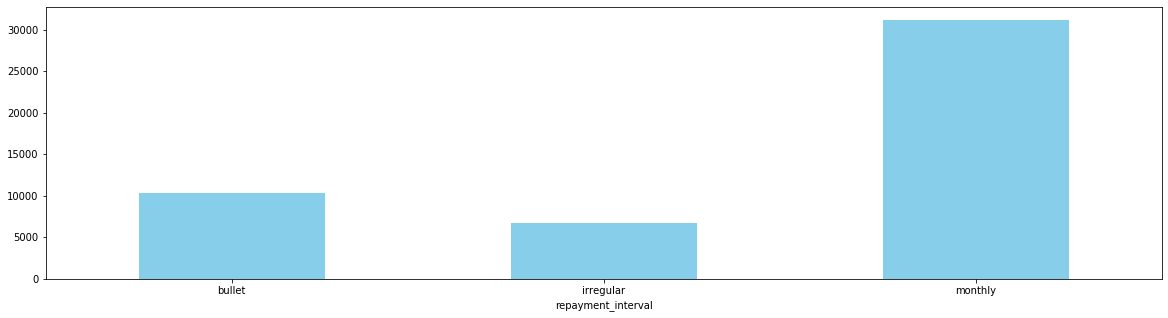

In [215]:
CountbySector = dfloanNew.groupby('repayment_interval').count()
CountbySector['id'].plot.bar(color='skyblue', rot = 0, alpha = 1,figsize=(20,5));

d. Are there any patterns of relationships between repayment behavior (“repayment_interval”) and other factors?

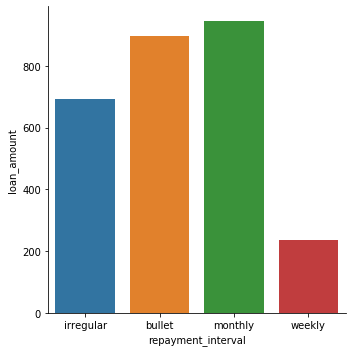

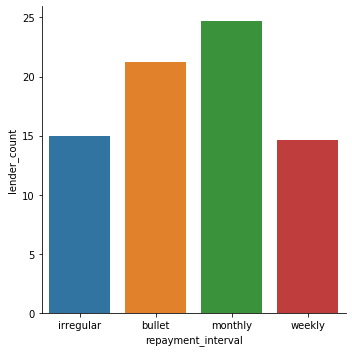

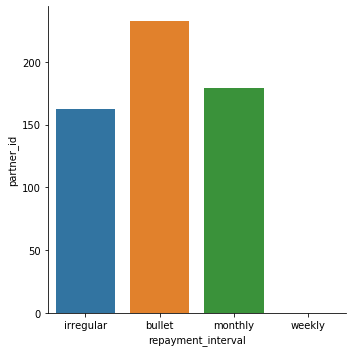

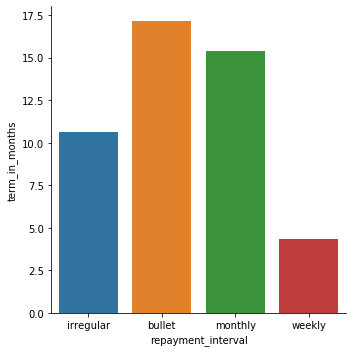

In [216]:
sns.catplot(x='repayment_interval', y='loan_amount', kind='bar', ci = False, data=dfloan);
sns.catplot(x='repayment_interval', y='lender_count', kind='bar', ci = False, data=dfloan);
sns.catplot(x='repayment_interval', y='partner_id', kind='bar', ci = False, data=dfloan);
sns.catplot(x='repayment_interval', y='term_in_months', kind='bar', ci = False, data=dfloan);

e. Is there a noticeable gender effect in this dataset?

In [197]:
dfloan['gender_new'] = dfloan['borrower_genders'].str.split(',').str[0]
dfloan

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,...,posted_time,disbursed_time,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date,gender_new
0,653051,300.0,300.0,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",PK,Pakistan,Lahore,PKR,...,2014-01-01 06:12:39+00:00,2013-12-17 08:00:00+00:00,2014-01-02 10:06:32+00:00,12.0,12,NaN,female,irregular,2014-01-01,female
1,653053,575.0,575.0,Rickshaw,Transportation,to repair and maintain the auto rickshaw used ...,PK,Pakistan,Lahore,PKR,...,2014-01-01 06:51:08+00:00,2013-12-17 08:00:00+00:00,2014-01-02 09:17:23+00:00,11.0,14,NaN,"female, female",irregular,2014-01-01,female
2,653068,150.0,150.0,Transportation,Transportation,To repair their old cycle-van and buy another ...,IN,India,Maynaguri,INR,...,2014-01-01 09:58:07+00:00,2013-12-17 08:00:00+00:00,2014-01-01 16:01:36+00:00,43.0,6,"user_favorite, user_favorite",female,bullet,2014-01-01,female
3,653063,200.0,200.0,Embroidery,Arts,to purchase an embroidery machine and a variet...,PK,Pakistan,Lahore,PKR,...,2014-01-01 08:03:11+00:00,2013-12-24 08:00:00+00:00,2014-01-01 13:00:00+00:00,11.0,8,NaN,female,irregular,2014-01-01,female
4,653084,400.0,400.0,Milk Sales,Food,to purchase one buffalo.,PK,Pakistan,Abdul Hakeem,PKR,...,2014-01-01 11:53:19+00:00,2013-12-17 08:00:00+00:00,2014-01-01 19:18:51+00:00,14.0,16,NaN,female,monthly,2014-01-01,female
5,1080148,250.0,250.0,Services,Services,purchase leather for my business using ksh 20000.,KE,Kenya,NaN,KES,...,2014-01-01 10:06:19+00:00,2014-01-30 01:42:48+00:00,2014-01-29 14:14:57+00:00,4.0,6,NaN,female,irregular,2014-01-01,female
6,653067,200.0,200.0,Dairy,Agriculture,To purchase a dairy cow and start a milk produ...,IN,India,Maynaguri,INR,...,2014-01-01 09:51:02+00:00,2013-12-16 08:00:00+00:00,2014-01-01 17:18:09+00:00,43.0,8,"user_favorite, user_favorite",female,bullet,2014-01-01,female
7,653078,400.0,400.0,Beauty Salon,Services,to buy more hair and skin care products.,PK,Pakistan,Ellahabad,PKR,...,2014-01-01 11:46:01+00:00,2013-12-20 08:00:00+00:00,2014-01-10 18:18:44+00:00,14.0,8,"#Elderly, #Woman Owned Biz",female,monthly,2014-01-01,female
8,653082,475.0,475.0,Manufacturing,Manufacturing,"to purchase leather, plastic soles and heels i...",PK,Pakistan,Lahore,PKR,...,2014-01-01 11:49:43+00:00,2013-12-20 08:00:00+00:00,2014-01-01 18:47:21+00:00,14.0,19,user_favorite,female,monthly,2014-01-01,female
9,653048,625.0,625.0,Food Production/Sales,Food,"to buy a stall, gram flour, ketchup, and coal ...",PK,Pakistan,Lahore,PKR,...,2014-01-01 05:41:03+00:00,2013-12-17 08:00:00+00:00,2014-01-03 15:45:04+00:00,11.0,24,NaN,female,irregular,2014-01-01,female


In [198]:
dfloan['gender_new'].value_counts()#Number of Female and Male borrowers

female    513643
male      153341
Name: gender_new, dtype: int64

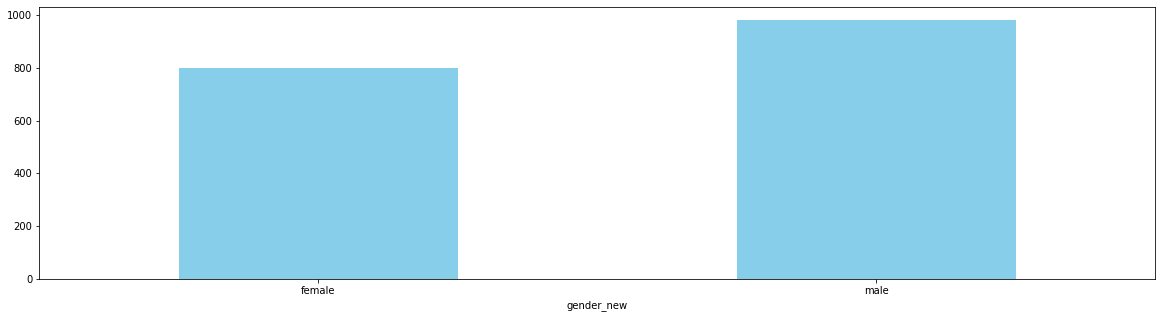

In [199]:
avgLoanGender = dfloan.groupby('gender_new')['loan_amount'].mean()#Average Loan amount by Gender:
avgLoanGender.plot.bar(color='skyblue', rot = 0, alpha = 1,figsize=(20,5));

f. Group the countries by their continents and highlight differences across the continents

In [250]:
def continentMapper(country):
    continentMap = {'Pakistan':'Asia', 'India':'Asia', 'Kenya':'Africa', 'Nicaragua':'North America', 'El Salvador':'North America',
       'Tanzania':'Africa', 'Philippines':'Asia', 'Peru':'South America', 'Senegal':'Africa', 'Cambodia':'Asia',
       'Liberia':'Africa', 'Vietnam':'Asia', 'Iraq':'Asia', 'Honduras':'North America', 'Palestine':'Asia', 'Mongolia':'Asia',
       'United States':'North America', 'Mali':'Africa', 'Colombia':'South America', 'Tajikistan':'Asia', 'Guatemala':'South America',
       'Ecuador':'South America', 'Bolivia':'South America', 'Yemen':'Asia', 'Ghana':'Africa', 'Sierra Leone':'Africa', 'Haiti':'North America',
       'Chile':'South America', 'Jordan':'Asia', 'Uganda':'Africa', 'Burundi':'Africa', 'Burkina Faso':'Africa',
       'Timor-Leste':'Asia', 'Indonesia':'Asia', 'Georgia':'Asia', 'Ukraine':'Europe', 'Kosovo':'Europe',
       'Albania':'Europe', 'The Democratic Republic of the Congo':'Africa', 'Costa Rica':'North America',
       'Somalia':'Africa', 'Zimbabwe':'Africa', 'Cameroon':'Africa', 'Turkey':'Asia', 'Azerbaijan':'Asia',
       'Dominican Republic':'North America', 'Brazil':'South America', 'Mexico':'North America', 'Kyrgyzstan':'Asia', 'Armenia':'Asia',
       'Paraguay':'South America', 'Lebanon':'Asia', 'Samoa':'Australia', 'Israel':'Asia', 'Rwanda':'Africa', 'Zambia':'Africa',
       'Nepal':'Asia', 'Congo':'Africa', 'Mozambique':'Africa', 'South Africa':'Africa', 'Togo':'Africa', 'Benin':'Africa',
       'Belize':'North America', 'Suriname':'South America', 'Thailand':'Asia', 'Nigeria':'Asia', 'Mauritania':'Africa',
       'Vanuatu':'Australia', 'Panama':'North America', 'Virgin Islands':'North America',
       'Saint Vincent and the Grenadines':'North America',
       "Lao People's Democratic Republic":'Asia', 'Malawi':'Africa', 'Myanmar (Burma)':'Africa',
       'Moldova':'Europe', 'South Sudan':'Africa', 'Solomon Islands':'Australia', 'China':'Asia', 'Egypt':'Africa',
       'Guam':'Australia', 'Afghanistan':'Asia', 'Madagascar':'Africa', 'Namibia':'Africa', 'Puerto Rico':'North America',
       'Lesotho':'Africa', "Cote D'Ivoire":'Africa', 'Bhutan':'Asia'}
    return continentMap[country]

In [251]:
dfloan['Continent']= dfloan['country'].apply(lambda x:continentMapper(x))
dfloan

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,...,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date,gender_new,Continent,tag_new,Year
0,653051,300.0,300.0,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",PK,Pakistan,Lahore,PKR,...,12.0,12,NaN,female,irregular,2014-01-01,female,Asia,NaN,2014.0
1,653053,575.0,575.0,Rickshaw,Transportation,to repair and maintain the auto rickshaw used ...,PK,Pakistan,Lahore,PKR,...,11.0,14,NaN,"female, female",irregular,2014-01-01,female,Asia,NaN,2014.0
2,653068,150.0,150.0,Transportation,Transportation,To repair their old cycle-van and buy another ...,IN,India,Maynaguri,INR,...,43.0,6,"user_favorite, user_favorite",female,bullet,2014-01-01,female,Asia,user_favorite,2014.0
3,653063,200.0,200.0,Embroidery,Arts,to purchase an embroidery machine and a variet...,PK,Pakistan,Lahore,PKR,...,11.0,8,NaN,female,irregular,2014-01-01,female,Asia,NaN,2014.0
4,653084,400.0,400.0,Milk Sales,Food,to purchase one buffalo.,PK,Pakistan,Abdul Hakeem,PKR,...,14.0,16,NaN,female,monthly,2014-01-01,female,Asia,NaN,2014.0
5,1080148,250.0,250.0,Services,Services,purchase leather for my business using ksh 20000.,KE,Kenya,NaN,KES,...,4.0,6,NaN,female,irregular,2014-01-01,female,Africa,NaN,2014.0
6,653067,200.0,200.0,Dairy,Agriculture,To purchase a dairy cow and start a milk produ...,IN,India,Maynaguri,INR,...,43.0,8,"user_favorite, user_favorite",female,bullet,2014-01-01,female,Asia,user_favorite,2014.0
7,653078,400.0,400.0,Beauty Salon,Services,to buy more hair and skin care products.,PK,Pakistan,Ellahabad,PKR,...,14.0,8,"#Elderly, #Woman Owned Biz",female,monthly,2014-01-01,female,Asia,#Elderly,2014.0
8,653082,475.0,475.0,Manufacturing,Manufacturing,"to purchase leather, plastic soles and heels i...",PK,Pakistan,Lahore,PKR,...,14.0,19,user_favorite,female,monthly,2014-01-01,female,Asia,user_favorite,2014.0
9,653048,625.0,625.0,Food Production/Sales,Food,"to buy a stall, gram flour, ketchup, and coal ...",PK,Pakistan,Lahore,PKR,...,11.0,24,NaN,female,irregular,2014-01-01,female,Asia,NaN,2014.0


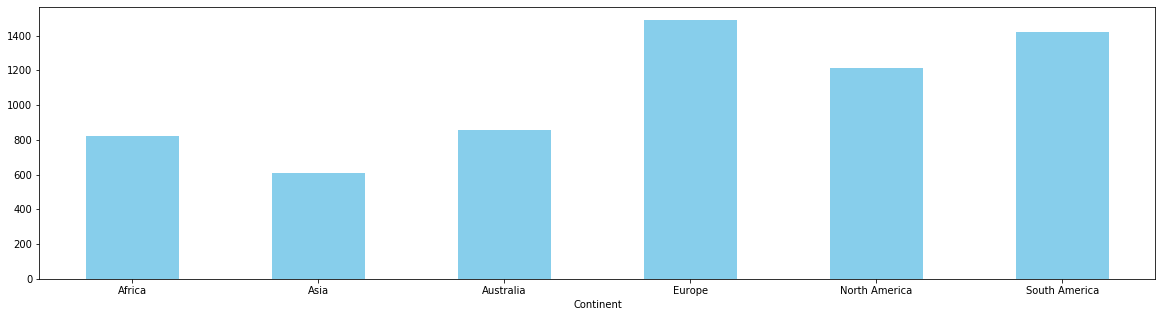

In [252]:
avgLoanContinent = dfloan.groupby('Continent')['loan_amount'].mean()#Average Loan amount by Continent:
avgLoanContinent.plot.bar(color='skyblue', rot = 0, alpha = 1,figsize=(20,5));

g. One of the tags is called “user_favorite.” Are there any noticeable differences between records with and without this tag?

In [253]:
dfloan['tag_new'] = dfloan['tags'].str.split(',').str[0]
dfloan

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,...,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date,gender_new,Continent,tag_new,Year
0,653051,300.0,300.0,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",PK,Pakistan,Lahore,PKR,...,12.0,12,NaN,female,irregular,2014-01-01,female,Asia,NaN,2014.0
1,653053,575.0,575.0,Rickshaw,Transportation,to repair and maintain the auto rickshaw used ...,PK,Pakistan,Lahore,PKR,...,11.0,14,NaN,"female, female",irregular,2014-01-01,female,Asia,NaN,2014.0
2,653068,150.0,150.0,Transportation,Transportation,To repair their old cycle-van and buy another ...,IN,India,Maynaguri,INR,...,43.0,6,"user_favorite, user_favorite",female,bullet,2014-01-01,female,Asia,user_favorite,2014.0
3,653063,200.0,200.0,Embroidery,Arts,to purchase an embroidery machine and a variet...,PK,Pakistan,Lahore,PKR,...,11.0,8,NaN,female,irregular,2014-01-01,female,Asia,NaN,2014.0
4,653084,400.0,400.0,Milk Sales,Food,to purchase one buffalo.,PK,Pakistan,Abdul Hakeem,PKR,...,14.0,16,NaN,female,monthly,2014-01-01,female,Asia,NaN,2014.0
5,1080148,250.0,250.0,Services,Services,purchase leather for my business using ksh 20000.,KE,Kenya,NaN,KES,...,4.0,6,NaN,female,irregular,2014-01-01,female,Africa,NaN,2014.0
6,653067,200.0,200.0,Dairy,Agriculture,To purchase a dairy cow and start a milk produ...,IN,India,Maynaguri,INR,...,43.0,8,"user_favorite, user_favorite",female,bullet,2014-01-01,female,Asia,user_favorite,2014.0
7,653078,400.0,400.0,Beauty Salon,Services,to buy more hair and skin care products.,PK,Pakistan,Ellahabad,PKR,...,14.0,8,"#Elderly, #Woman Owned Biz",female,monthly,2014-01-01,female,Asia,#Elderly,2014.0
8,653082,475.0,475.0,Manufacturing,Manufacturing,"to purchase leather, plastic soles and heels i...",PK,Pakistan,Lahore,PKR,...,14.0,19,user_favorite,female,monthly,2014-01-01,female,Asia,user_favorite,2014.0
9,653048,625.0,625.0,Food Production/Sales,Food,"to buy a stall, gram flour, ketchup, and coal ...",PK,Pakistan,Lahore,PKR,...,11.0,24,NaN,female,irregular,2014-01-01,female,Asia,NaN,2014.0


In [254]:
dfloanTag = dfloan[dfloan['tag_new'] == 'user_favorite']
dfloanTag

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,...,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date,gender_new,Continent,tag_new,Year
2,653068,150.0,150.0,Transportation,Transportation,To repair their old cycle-van and buy another ...,IN,India,Maynaguri,INR,...,43.0,6,"user_favorite, user_favorite",female,bullet,2014-01-01,female,Asia,user_favorite,2014.0
6,653067,200.0,200.0,Dairy,Agriculture,To purchase a dairy cow and start a milk produ...,IN,India,Maynaguri,INR,...,43.0,8,"user_favorite, user_favorite",female,bullet,2014-01-01,female,Asia,user_favorite,2014.0
8,653082,475.0,475.0,Manufacturing,Manufacturing,"to purchase leather, plastic soles and heels i...",PK,Pakistan,Lahore,PKR,...,14.0,19,user_favorite,female,monthly,2014-01-01,female,Asia,user_favorite,2014.0
14,653075,225.0,225.0,Poultry,Agriculture,to expand her existing poultry farm business.,IN,India,Dhupguri,INR,...,43.0,7,user_favorite,female,bullet,2014-01-01,female,Asia,user_favorite,2014.0
18,653066,250.0,250.0,Sewing,Services,to purchase a sewing machine.,IN,India,Maynaguri,INR,...,43.0,4,"user_favorite, user_favorite",female,bullet,2014-01-01,female,Asia,user_favorite,2014.0
26,653069,250.0,250.0,Construction Supplies,Construction,to purchase stones for starting a business sup...,IN,India,Maynaguri,INR,...,43.0,10,"user_favorite, user_favorite",female,bullet,2014-01-01,female,Asia,user_favorite,2014.0
33,653072,250.0,250.0,Farming,Agriculture,to cultivate broad beans on her own land.,IN,India,Dhupguri,INR,...,43.0,10,"user_favorite, user_favorite",female,bullet,2014-01-01,female,Asia,user_favorite,2014.0
34,653086,400.0,400.0,Milk Sales,Food,to purchase one cow.,PK,Pakistan,Sialkot,PKR,...,14.0,16,user_favorite,female,monthly,2014-01-01,female,Asia,user_favorite,2014.0
61,653308,150.0,150.0,Food Market,Food,"to purchase more palm oil, bitter ball, pepper...",LR,Liberia,New Kru,LRD,...,11.0,6,user_favorite,female,irregular,2014-01-02,female,Africa,user_favorite,2014.0
62,653290,4275.0,4275.0,Personal Housing Expenses,Housing,to pay for the construction of a hygienic toil...,VN,Vietnam,Hai Duong,VND,...,14.0,144,"user_favorite, #Low-profit FP, #Post-disbursed...","female, female, female, female, female, female...",bullet,2014-01-02,female,Asia,user_favorite,2014.0


In [255]:
dfloanTagNot = dfloan[dfloan['tag_new'] != 'user_favorite']
dfloanTagNot

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,...,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date,gender_new,Continent,tag_new,Year
0,653051,300.0,300.0,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",PK,Pakistan,Lahore,PKR,...,12.0,12,NaN,female,irregular,2014-01-01,female,Asia,NaN,2014.0
1,653053,575.0,575.0,Rickshaw,Transportation,to repair and maintain the auto rickshaw used ...,PK,Pakistan,Lahore,PKR,...,11.0,14,NaN,"female, female",irregular,2014-01-01,female,Asia,NaN,2014.0
3,653063,200.0,200.0,Embroidery,Arts,to purchase an embroidery machine and a variet...,PK,Pakistan,Lahore,PKR,...,11.0,8,NaN,female,irregular,2014-01-01,female,Asia,NaN,2014.0
4,653084,400.0,400.0,Milk Sales,Food,to purchase one buffalo.,PK,Pakistan,Abdul Hakeem,PKR,...,14.0,16,NaN,female,monthly,2014-01-01,female,Asia,NaN,2014.0
5,1080148,250.0,250.0,Services,Services,purchase leather for my business using ksh 20000.,KE,Kenya,NaN,KES,...,4.0,6,NaN,female,irregular,2014-01-01,female,Africa,NaN,2014.0
7,653078,400.0,400.0,Beauty Salon,Services,to buy more hair and skin care products.,PK,Pakistan,Ellahabad,PKR,...,14.0,8,"#Elderly, #Woman Owned Biz",female,monthly,2014-01-01,female,Asia,#Elderly,2014.0
9,653048,625.0,625.0,Food Production/Sales,Food,"to buy a stall, gram flour, ketchup, and coal ...",PK,Pakistan,Lahore,PKR,...,11.0,24,NaN,female,irregular,2014-01-01,female,Asia,NaN,2014.0
10,653060,200.0,200.0,Rickshaw,Transportation,to cover the cost of repairing rickshaw,PK,Pakistan,Lahore,PKR,...,11.0,3,NaN,female,irregular,2014-01-01,female,Asia,NaN,2014.0
11,653088,400.0,400.0,Wholesale,Wholesale,"to purchase biscuits, sweets and juices in bulk.",PK,Pakistan,Faisalabad,PKR,...,14.0,16,NaN,female,monthly,2014-01-01,female,Asia,NaN,2014.0
12,653089,400.0,400.0,General Store,Retail,"to buy stock of rice, sugar and flour .",PK,Pakistan,Faisalabad,PKR,...,14.0,16,"#Repeat Borrower, #Woman Owned Biz",female,monthly,2014-01-01,female,Asia,#Repeat Borrower,2014.0


In [256]:
dfloanTag.describe()-dfloanTagNot.describe()

,id,funded_amount,loan_amount,partner_id,term_in_months,lender_count,Year
count,-524381.000000,-524381.000000,-524381.000000,-513156.000000,-524381.000000,-524381.000000,-482918.000000
mean,-71322.056699,548.153995,538.476248,3.572910,1.387125,14.293545,-0.357230
std,-15238.607579,816.950274,825.014692,14.932003,2.200556,22.294281,-0.072684
min,19.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,-43650.500000,150.000000,150.000000,-7.000000,0.000000,4.000000,-1.000000
50%,-117839.000000,275.000000,275.000000,1.000000,1.000000,9.000000,0.000000
75%,-115598.750000,600.000000,575.000000,27.000000,1.000000,16.000000,0.000000
max,-638.000000,50000.000000,50000.000000,-1.000000,2.000000,1221.000000,0.000000


We can notice avergae loan amount, funded amount is significantly higher for user_favourite compared to other ones without the tag.

# 3. Now, come up with 5 additional exploratory questions/ideas relevant to this data and answer them. Illustrate your answers with appropriate graphs.

a. Gender variation across continent

In [257]:
df_loan = dfloan.groupby(['gender_new','Continent']).mean()
df_loan

id  funded_amount  loan_amount  \
gender_new Continent                                                 
female     Africa         9.995290e+05     757.884377   786.236246   
           Asia           1.003722e+06     540.631459   563.308688   
           Australia      9.987341e+05     769.227932   853.574154   
           Europe         9.620342e+05    1392.451691  1442.522142   
           North America  9.693708e+05    1050.343596  1181.774834   
           South America  9.895429e+05    1577.593432  1616.575639   
male       Africa         9.858332e+05     835.140493   918.221232   
           Asia           9.925180e+05     757.234021   844.947405   
           Australia      1.056380e+06    1003.623188  1051.086957   
           Europe         9.700418e+05    1404.941589  1546.705607   
           North America  9.652956e+05    1010.555169  1249.381309   
           South America  9.750257e+05     911.943166  1008.860160   

                          partner_id  term_in_months  lender_count  \
gender_new Continent                                                 
female     Africa         200.855339       11.135767     20.627672   
           Asia           176.465159       13.355056     15.282891   
           Australia       43.019336       13.913381     23.380819   
           Europe         203.747585       22.696055     46.226248   
           North America  181.998205       16.456740     27.144343   
           South America  135.765990       12.487874     30.654438   
male       Africa         202.886633       13.073385     23.531457   
           Asia           184.652374       17.611380     21.821799   
           Australia       19.231884       10.492754     24.550725   
           Europe         218.786449       22.230841     45.484112   
           North America  185.721500       17.681657     25.615663   
           South America  160.845497       15.125028     24.027545   

                                 Year  
gender_new Continent                   
female     Africa         2015.344446  
           Asia           2015.475098  
           Australia      2015.442496  
           Europe         2015.232219  
           North America  2015.278337  
           South America  2015.410107  
male       Africa         2015.385563  
           Asia           2015.380644  
           Australia      2015.835821  
           Europe         2015.268607  
           North America  2015.251312  
           South America  2015.341620

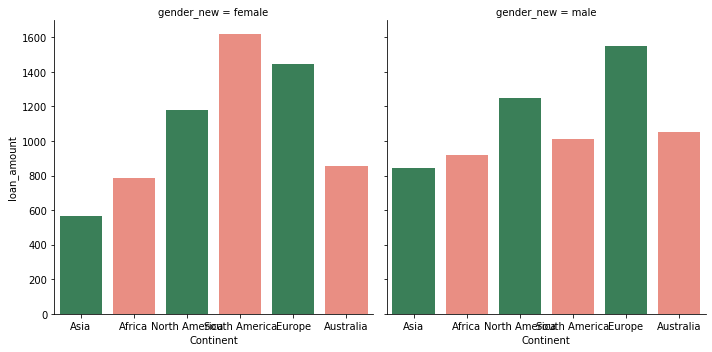

In [258]:
sns.catplot(x='Continent', y='loan_amount', col='gender_new', kind='bar',  palette=['seagreen','salmon'], ci=False, data = dfloan);

In [ ]:
b. Loan amount Variation accross year

In [234]:
dfloan['Year'] = dfloan['funded_time'].apply(lambda x: x.year)

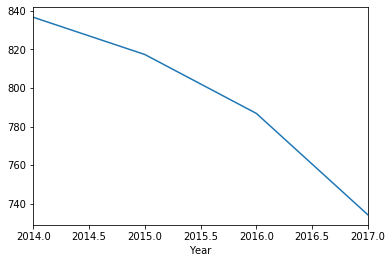

In [239]:
df_loanYear = dfloan.groupby(['Year']).mean()
df_loanYear['loan_amount'].plot();

We can see Loan_amount is decreasing over the years.

c. Top 1000 funded amount analysis

In [259]:
def get_top1000(group):
    return group.sort_values(by = 'funded_amount', ascending = False)[:1000]

In [260]:
top1000 = dfloan.groupby('gender_new').apply(get_top1000)
top1000

id  funded_amount  loan_amount  \
gender_new                                               
female     70499    722883       100000.0     100000.0   
           544548  1205071        50000.0      50000.0   
           509048  1169175        50000.0      50000.0   
           523659  1183916        50000.0      50000.0   
           586970  1247422        50000.0      50000.0   
           614922  1277084        50000.0      50000.0   
           631904  1294308        50000.0      50000.0   
           494470  1154951        50000.0      50000.0   
           53634    706146        50000.0      50000.0   
           565733  1226382        50000.0      50000.0   
           163727   812995        50000.0      50000.0   
           563074  1223392        50000.0      50000.0   
           197210   845211        49950.0      49950.0   
           660807  1323028        46125.0      50000.0   
           563324  1224037        40000.0      40000.0   
           439464  1099654        40000.0      40000.0   
           579121  1240076        40000.0      40000.0   
           527743  1188063        35000.0      35000.0   
           561691  1222360        35000.0      35000.0   
           473082  1133430        35000.0      35000.0   
           488371  1148365        35000.0      35000.0   
           508531  1169169        32000.0      32000.0   
           490589  1150884        30000.0      30000.0   
           509068  1169173        30000.0      30000.0   
           603786  1265287        30000.0      30000.0   
           222348   870345        30000.0      30000.0   
           662660  1325702        30000.0      30000.0   
           164106   812996        25000.0      25000.0   
           163872   812994        25000.0      25000.0   
           660211  1322535        25000.0      25000.0   
...                    ...            ...          ...   
male       269696   917130         6625.0       6625.0   
           511882  1172140         6625.0       6625.0   
           428679  1075455         6600.0       6600.0   
           456172  1116457         6600.0       6600.0   
           267449   914554         6600.0       6600.0   
           131977   782716         6600.0       6600.0   
           156874   806481         6600.0       6600.0   
           287689   935102         6600.0       6600.0   
           281514   928827         6600.0       6600.0   
           292345   939235         6600.0       6600.0   
           30698    684071         6575.0       6575.0   
           244035   891591         6575.0       6575.0   
           125241   776646         6575.0       6575.0   
           236608   884809         6575.0       6575.0   
           52963    705310         6575.0       6575.0   
           445956  1105762         6575.0       6575.0   
           271633   919106         6550.0       6550.0   
           164574   813614         6550.0       6550.0   
           40885    693794         6550.0       9675.0   
           345140   991638         6550.0       6550.0   
           292047   938867         6550.0       6550.0   
           302206   948957         6550.0       6550.0   
           182450   830827         6525.0       6525.0   
           440082  1100223         6525.0       6525.0   
           68909    721450         6525.0       7600.0   
           13823    666895         6525.0       6525.0   
           342057   989048         6525.0       6525.0   
           174959   823794         6525.0       6525.0   
           90301    741993         6525.0       6525.0   
           293425   940101         6525.0       6525.0   

                                     activity          sector  \
gender_new                                                      
female     70499                  Agriculture     Agriculture   
           544548                      Health          Health   
           509048                     Poultry     Agriculture   
           523659           Electronics Sale

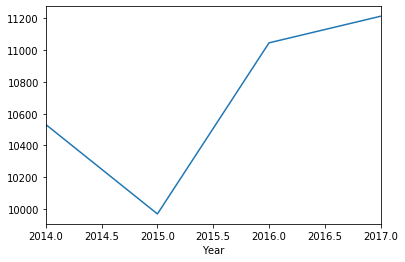

In [261]:
top1000.groupby(['Year'])['funded_amount'].mean().plot();

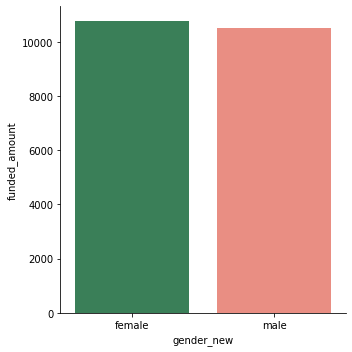

In [263]:
sns.catplot(x='gender_new', y='funded_amount', kind='bar',  palette=['seagreen','salmon'], ci=False, data = top1000);

In [ ]:
d. Sector by Continent

In [272]:
df_loanSector = dfloan.groupby(['Continent','sector'])['funded_amount'].mean()
df_loanSector

Continent      sector        
Africa         Agriculture        686.837035
               Arts               792.494481
               Clothing           901.799570
               Construction       995.335864
               Education          879.420696
               Entertainment      688.586957
               Food               867.384169
               Health            1329.228084
               Housing            588.354665
               Manufacturing     1028.413174
               Personal Use       320.066372
               Retail             835.510112
               Services           671.558547
               Transportation     510.881470
               Wholesale         1728.296703
Asia           Agriculture        638.213227
               Arts               562.251861
               Clothing           736.705169
               Construction       835.985312
               Education          959.821237
               Entertainment      883.363636
               Food      

e. Correlation between funded amount, loan amount and term in months.

                funded_amount  term_in_months  loan_amount
funded_amount        1.000000        0.149310     0.945044
term_in_months       0.149310        1.000000     0.184795
loan_amount          0.945044        0.184795     1.000000


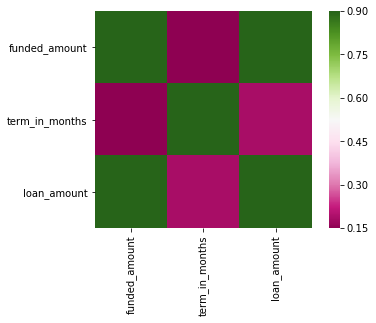

In [276]:
matrix= dfloan[['funded_amount', 'term_in_months','loan_amount']].corr()
print(matrix)
sns.heatmap(matrix, vmax = .9, square = True, cmap="PiYG");